In [1]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

df = DataFrame({'message': [], 'class': []})

df = df.append(dataFrameFromDirectory('C:/Users/krina/emails/spam', 'spam'))
df= df.append(dataFrameFromDirectory('C:/Users/krina/emails/ham', 'ham'))


C:\Users\krina\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
df.head()

,class,message
C:/Users/krina/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
C:/Users/krina/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
C:/Users/krina/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
C:/Users/krina/emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...
C:/Users/krina/emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...


In [24]:
df['length'] = df['message'].apply(len)

In [25]:
df['length'].head()

C:/Users/krina/emails/spam\00001.7848dde101aa985090474a91ec93fcf0    3966
C:/Users/krina/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09     820
C:/Users/krina/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c     669
C:/Users/krina/emails/spam\00004.eac8de8d759b7e74154f142194282724    3004
C:/Users/krina/emails/spam\00005.57696a39d7d84318ce497886896bf90d     687
Name: length, dtype: int64

In [26]:
for message_no, message in enumerate(df['message'][:5]):
    print(message_no, message)
    print('\n')

0 <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">

<HTML><HEAD>

<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=

ype>

<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>

<BODY><!-- Inserted by Calypso -->

<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=

ules=3Dnone 

style=3D"COLOR: black; DISPLAY: none" width=3D"100%">

  <TBODY>

  <TR>

    <TD colSpan=3D3>

      <HR color=3Dblack noShade SIZE=3D1>

    </TD></TR></TD></TR>

  <TR>

    <TD colSpan=3D3>

      <HR color=3Dblack noShade SIZE=3D1>

    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=

 --><FONT 

color=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=

/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 

face=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">

<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=

0000 

face=3D"Copperplate Gothic Bold" size=3D5 

In [27]:
df['message'].describe()

count                                                  3000
unique                                                 2943
top       URL: http://www.askbjoernhansen.com/archives/2...
freq                                                      4
Name: message, dtype: object

In [28]:
by_class=df.groupby('class')['message']

In [29]:
by_class.describe()

,count,unique,top,freq
class,,,,
ham,2500,2472,URL: http://www.askbjoernhansen.com/archives/2...,4
spam,500,471,Lowest rates available for term life insurance...,4


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

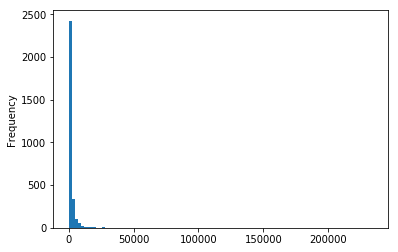

In [31]:
len_message.plot(bins=100, kind='hist') 

In [32]:
df['length'].describe()

count      3000.000000
mean       2196.253333
std        7378.845770
min          54.000000
25%         526.000000
50%        1025.000000
75%        1857.000000
max      234358.000000
Name: length, dtype: float64

In [33]:
df[df['length'] == 234358]['message'].iloc[0]

'This is a multi-part message in MIME format.\n\n\n\n------=_NextPart_000_01BC2B74.89D1CCC0\n\nContent-Type: multipart/alternative; \n\n\tboundary="----=_NextPart_84815C5ABAF209EF376268C8"\n\n\n\n------=_NextPart_84815C5ABAF209EF376268C8\n\nContent-type: text/plain; charset=windows-1252\n\nContent-Transfer-Encoding: quoted-printable\n\n\n\nDear Sir/Madam\n\n\n\nWishing you a wonderful day=2E  With an offer, to save you money and  time=\n\n=2E Shopping from the convenience from  home or office=2E\n\nWindow shopping, A new way to go window shopping=2E Our online super store=\n\n offers over 1500 quality products, with 15 plus categories=2E\n\nFor you to, window shop through=2E=20\n\n\n\nThe following are E-coupons numbers, which you can use with any order=2E Y=\n\nou place from Johnson Home Products Online Super Store=2E\n\nDuring the check out process of our online secure shopping cart system ord=\n\ner form, you will be prompt to enter in the E-coupon\n\nnumber=2E which will give you, 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3994A8>,
      dtype=object)

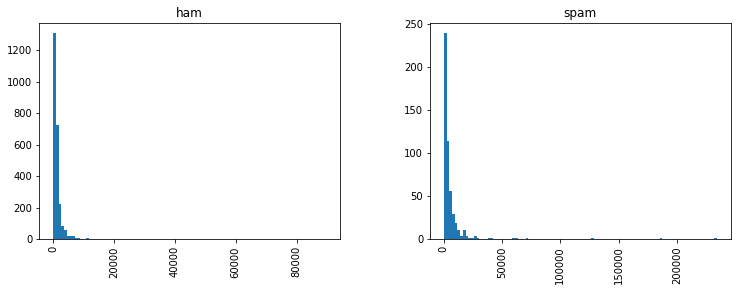

In [37]:
df.hist(column='length', by='class', bins=100,figsize=(12,4))


In [44]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
df.head()

,class,message,length
C:/Users/krina/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",3966
C:/Users/krina/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,820
C:/Users/krina/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,669
C:/Users/krina/emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...,3004
C:/Users/krina/emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...,687


In [46]:
df['message'].head(5).apply(text_process)

C:/Users/krina/emails/spam\00001.7848dde101aa985090474a91ec93fcf0    [DOCTYPE, HTML, PUBLIC, W3CDTD, HTML, 40, Tran...
C:/Users/krina/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09    [1, Fight, Risk, Cancer, httpwwwadclickwspcfmo...
C:/Users/krina/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c    [1, Fight, Risk, Cancer, httpwwwadclickwspcfmo...
C:/Users/krina/emails/spam\00004.eac8de8d759b7e74154f142194282724    [Adult, Club, Offers, FREE, Membership, INSTAN...
C:/Users/krina/emails/spam\00005.57696a39d7d84318ce497886896bf90d    [thought, might, like, 1, Slim, Guaranteed, lo...
Name: message, dtype: object

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

70393


In [60]:
message4 = df['message'][1000]
print(message4)

On 9/8/02 3:16 PM, "Gary Lawrence Murphy" <garym@canada.com> wrote:

>>>>>> "J" == James Rogers <jamesr@best.com> writes:

> 

>   J> An example: Being able to model RF propagation in three

>   J> dimensions for a metro area when deploying wireless networks.

>   J> By having every single tree and building detail and similar,

>   J> you can "see" even tiny dead spots due to physical blockage and

>   J> signal attenuation.

> 

> Hmmm, just as I thought.  In other words, it has no practical uses

> whatsoever ;) ... do the biz guys in your office /really/ think WISPs

> are really going to shell out /their/ money to find a house or two

> they can't reach?  Experience suggests (a) they won't care and (b)

> they will even sign up that errant house and then give them a

> run-around blaming the dead-spot on "unsupported vendor equipment".





Errrr....the biz guys in my office don't care what the "WISPs" want to do

with their little WiFi networks.  And the bandwidth shadows in most 

In [61]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 3622)	1
  (0, 5974)	1
  (0, 9058)	1
  (0, 12113)	1
  (0, 12302)	1
  (0, 13591)	1
  (0, 14756)	1
  (0, 16143)	6
  (0, 16308)	2
  (0, 17363)	1
  (0, 19113)	1
  (0, 20801)	1
  (0, 22354)	2
  (0, 23006)	2
  (0, 27223)	2
  (0, 27528)	1
  (0, 29010)	1
  (0, 29047)	1
  (0, 29094)	1
  (0, 29256)	1
  (0, 30632)	2
  (0, 30633)	1
  (0, 30638)	2
  (0, 30932)	1
  (0, 31062)	1
  :	:
  (0, 64111)	1
  (0, 64165)	1
  (0, 64413)	1
  (0, 64632)	2
  (0, 64711)	1
  (0, 64935)	1
  (0, 64962)	1
  (0, 65179)	1
  (0, 65433)	1
  (0, 65575)	1
  (0, 65726)	1
  (0, 65761)	1
  (0, 65767)	1
  (0, 66942)	1
  (0, 66983)	1
  (0, 67176)	1
  (0, 67514)	1
  (0, 67711)	1
  (0, 67772)	1
  (0, 68576)	1
  (0, 68652)	5
  (0, 68757)	1
  (0, 68774)	1
  (0, 68891)	1
  (0, 68905)	1
(1, 70393)


In [62]:
print(bow_transformer.get_feature_names()[22354])
print(bow_transformer.get_feature_names()[23006])

RF
Rogers


In [63]:
messages_bow = bow_transformer.transform(df['message'])

In [64]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (3000, 70393)
Amount of Non-Zero occurences:  321945


In [65]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 68905)	0.019915248803895332
  (0, 68891)	0.032757003657206914
  (0, 68774)	0.038153656952575075
  (0, 68757)	0.037161497014326104
  (0, 68652)	0.23899910128040694
  (0, 68576)	0.06419143457104279
  (0, 67772)	0.05022314570060289
  (0, 67711)	0.027822540559736708
  (0, 67514)	0.0253992151152152
  (0, 67176)	0.07003024539833479
  (0, 66983)	0.04909832753368832
  (0, 66942)	0.05493713836098032
  (0, 65767)	0.02578707191416518
  (0, 65761)	0.041240602845239706
  (0, 65726)	0.02813721163833443
  (0, 65575)	0.06077594918827231
  (0, 65433)	0.05106621106658082
  (0, 65179)	0.05493713836098032
  (0, 64962)	0.0382499279824347
  (0, 64935)	0.02837367975331187
  (0, 64711)	0.05063413567042099
  (0, 64632)	0.12155189837654462
  (0, 64413)	0.04380316490488002
  (0, 64165)	0.05063413567042099
  (0, 64111)	0.021270691287064547
  :	:
  (0, 31062)	0.03301306055808486
  (0, 30932)	0.06419143457104279
  (0, 30638)	0.07968806264725167
  (0, 30633)	0.045452043510119756
  (0, 30632)	0.0806510245547932

In [69]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Free']])

4.108861045489456


In [70]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(3000, 70393)


In [71]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['class'])

In [75]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df['class'][3])

predicted: ham
expected: spam


In [76]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['spam' 'spam' 'spam' ... 'ham' 'ham' 'ham']


In [77]:
from sklearn.metrics import classification_report
print (classification_report(df['class'], all_predictions))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      2500
        spam       1.00      0.61      0.76       500

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.96      0.81      0.86      3000
weighted avg       0.94      0.94      0.93      3000



In [78]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['message'], df['class'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

2400 600 3000


In [79]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [80]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000D947AE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [81]:
predictions = pipeline.predict(msg_test)

In [83]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.89      0.94       562
        spam       0.38      1.00      0.55        38

   micro avg       0.90      0.90      0.90       600
   macro avg       0.69      0.94      0.74       600
weighted avg       0.96      0.90      0.92       600

